<a href="https://colab.research.google.com/github/bianchin90/Projects/blob/master/BDA_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Default title text
#download file 
!wget https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz




--2021-04-06 18:43:30--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.101.30
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.101.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22870508 (22M) [application/x-gzip]
Saving to: ‘amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz’

amazon_reviews_us_M 100%[===================>]  21.81M  21.6MB/s    in 1.0s    

2021-04-06 18:43:31 (21.6 MB/s) - ‘amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz’ saved [22870508/22870508]



In [3]:
import gzip
import shutil
with gzip.open('amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz', 'rb') as f_in:
    with open('amazon_reviews_us_Mobile_Electronics_v1_00.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [4]:
#read amazon reviews dataset
import pandas as pd
df = pd.read_csv("amazon_reviews_us_Mobile_Electronics_v1_00.tsv",sep="\t", error_bad_lines=False)
df.head()


b'Skipping line 35246: expected 15 fields, saw 22\n'
b'Skipping line 87073: expected 15 fields, saw 22\n'


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


In [5]:
#download sentiment analysis
!wget https://www2.imm.dtu.dk/pubdb/views/edoc_download.php/6010/zip/imm6010.zip

import zipfile
with zipfile.ZipFile("imm6010.zip", 'r') as zip_ref:
    zip_ref.extractall()

--2021-04-06 18:43:46--  https://www2.imm.dtu.dk/pubdb/views/edoc_download.php/6010/zip/imm6010.zip
Resolving www2.imm.dtu.dk (www2.imm.dtu.dk)... 130.225.68.4
Connecting to www2.imm.dtu.dk (www2.imm.dtu.dk)|130.225.68.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.imm.dtu.dk/pubdb/edoc/imm6010.zip [following]
--2021-04-06 18:43:47--  https://www2.imm.dtu.dk/pubdb/edoc/imm6010.zip
Reusing existing connection to www2.imm.dtu.dk:443.
HTTP request sent, awaiting response... 200 OK
Length: 16227 (16K) [application/zip]
Saving to: ‘imm6010.zip’

imm6010.zip         100%[===================>]  15.85K   102KB/s    in 0.2s    

2021-04-06 18:43:47 (102 KB/s) - ‘imm6010.zip’ saved [16227/16227]



In [6]:
#read AFINN-111
afinn = pd.read_csv("AFINN/AFINN-111.txt",sep="\t", error_bad_lines=False, header = None, names = ["word", "rate"])
afinn.head()

#cast afinn to dictionary
afinn_dict = dict(zip(afinn.word, afinn.rate))


In [7]:
#core of the script: sentiment analysis
import numpy as np


#add two new columns to amazon dataframe: number of matched words with afinn dataset and sum of afinn ratings for matched words 
df["matched"] = np.nan
df["matched_rate"] = np.nan

for index, row in df.iterrows():
    #create tokenized words
    try:
      #split review body into single tokens
      tokens = row["review_body"].lower().replace('.', '').split(' ')
      counter = 0
      afinn_rate = 0
      print("processing record nr : {0}".format(index))
      for elem in tokens :      
        try :
          #look for review word in afinn dataset
          afinn_rate += afinn_dict[elem]
          #if there is a match, increase counter by one
          counter += 1
        except KeyError: 
          l = 0
      #update values for that record 
      df.at[index,'matched'] = counter
      df.at[index,'matched_rate'] = afinn_rate
    
    except AttributeError:
      m = 0
    #print(tokens)
#    if index == 10 :
#      break

df.head()

Streaming output truncated to the last 5000 lines.
processing record nr : 99852
processing record nr : 99853
processing record nr : 99854
processing record nr : 99855
processing record nr : 99856
processing record nr : 99857
processing record nr : 99858
processing record nr : 99859
processing record nr : 99860
processing record nr : 99861
processing record nr : 99862
processing record nr : 99863
processing record nr : 99864
processing record nr : 99865
processing record nr : 99866
processing record nr : 99867
processing record nr : 99868
processing record nr : 99869
processing record nr : 99870
processing record nr : 99871
processing record nr : 99872
processing record nr : 99873
processing record nr : 99874
processing record nr : 99875
processing record nr : 99876
processing record nr : 99877
processing record nr : 99878
processing record nr : 99879
processing record nr : 99880
processing record nr : 99881
processing record nr : 99882
processing record nr : 99883
processing record nr 

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,matched,matched_rate
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31,2.0,4.0
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31,1.0,3.0
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31,2.0,4.0
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31,0.0,0.0
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31,2.0,3.0


Pearson correlation: 0.49522284015471746


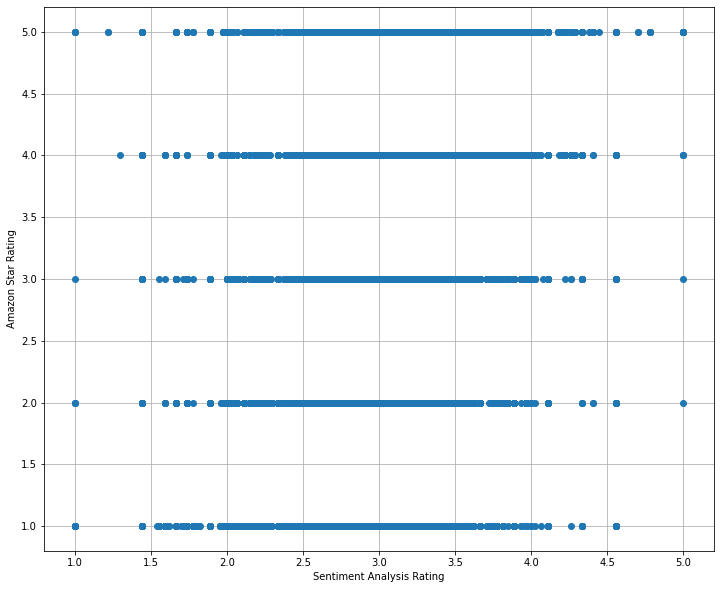

In [24]:
from google.colab import files
from scipy import stats
#compute sentiment analysis rating as  matched_rate / number of matched words
df["avg_matched"] = df["matched_rate"] / df["matched"]

df = df.dropna()

#rescale afinn rating in range 1-5 (originally it was between -4 and +4)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((1, 5))
df["avg_matched"] = scaler.fit_transform(df[["avg_matched"]])

#plot results
scatter = df.plot(x='avg_matched', y='star_rating', style='o', grid = True, legend=False, figsize=(12,10))
scatter.set_xlabel("Sentiment Analysis Rating")
scatter.set_ylabel("Amazon Star Rating")


#compute pearson correlation
print("Pearson correlation: {0}".format(stats.pearsonr(df["star_rating"], df["avg_matched"])[0]))


#uncomment to download a csv file of the result
#df.to_csv('NLP_result.csv', sep='\t' ,header=True, index = False)
#files.download("NLP_result.csv")

